## Import libraries

In [61]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
import joblib

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix

## Shuffle and split data 

In [62]:
def shuffle_and_split_data(data, train_ratio, test_ratio):
    X = data.iloc[:, :-1]
    Y = data.iloc[:, -1]
    # Split data with random_state = 45 
    return train_test_split(X, Y, train_size = train_ratio, test_size = test_ratio, stratify = Y, shuffle = True, random_state = 45)

## Train and visualize decision tree

In [63]:
def train_and_visualize_decision_tree(feature_train, label_train, train_ratio, test_ratio, max_depth = None):
    # Encode training features
    feature_train_encoded = pd.get_dummies(feature_train)
    
    # Create and train decision tree
    clf = DecisionTreeClassifier(criterion = 'entropy', max_depth = max_depth)
    clf.fit(feature_train_encoded, label_train)
    
    # Export decision tree to DOT format and visualize with graphviz
    dot_data = export_graphviz(clf, out_file = None, feature_names = feature_train_encoded.columns, class_names = clf.classes_)
    graph = graphviz.Source(dot_data)

    display(graph)
    
    # Save decision tree to file .png
    filename = f'decision_tree_depth_{max_depth}_ratio_{int(train_ratio*100)}_{int(test_ratio*100)}' if max_depth is not None else f'decision_tree_depth_None_ratio_{int(train_ratio*100)}_{int(test_ratio*100)}'
    graph.render(filename, format='png', cleanup = True)

    # Save trained model to file .joblib
    joblib.dump(clf, f'decision_tree_{int(train_ratio * 100)}_{int(test_ratio * 100)}.joblib')

## Predict and report

In [64]:
def predict_and_report(feature_test, label_test, train_ratio, test_ratio):
    # Load trained model
    clf = joblib.load(f'decision_tree_{int(train_ratio * 100)}_{int(test_ratio * 100)}.joblib')
    
    # Encode testing features and predict labels
    feature_test_encoded = pd.get_dummies(feature_test)
    y_pred = clf.predict(feature_test_encoded)
    
    # Print classification report and confusion matrix
    print(f"Classification report with {int(train_ratio * 100)}/{int(test_ratio * 100)}:")
    print(classification_report(label_test, y_pred, zero_division = 1))
    conf_matrix = confusion_matrix(label_test, y_pred)
    sns.heatmap(conf_matrix, annot = True, cmap = "YlGnBu", fmt = "d")
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f"Confusion Matrix: {int(train_ratio * 100)}/{int(test_ratio * 100)}")
    plt.show()

## Visualize class distributions

In [65]:
def visualize_class_distributions(data, feature_train, feature_test, label_train, label_test, train_ratio, test_ratio):
    # Create subplots for visualization
    fig, axs = plt.subplots(1, 3, figsize = (18, 6))
    titles = ['Original Data', 'Training Set', 'Test Set']
    datasets = [data, feature_train, feature_test]
    label_sets = [data.iloc[:, -1], label_train, label_test]
    
    # Iterate over datasets
    for i, (dataset, labels, title) in enumerate(zip(datasets, label_sets, titles)):
        class_counts = np.unique(labels, return_counts = True)[1]
        class_names = np.unique(labels)
        
        # Plot bar chart of class distribution
        axs[i].bar(class_names, class_counts)
        axs[i].set_title(f'{title} ({int(train_ratio * 100)}/{int(test_ratio * 100)})')
        axs[i].set_xlabel('Class')
        axs[i].set_ylabel('Count')
        axs[i].tick_params(axis = 'x', rotation = 45)
    
    plt.tight_layout()
    plt.show()

## 

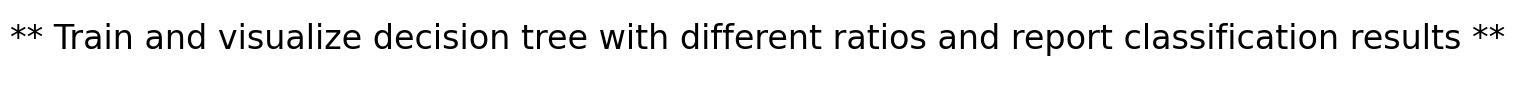

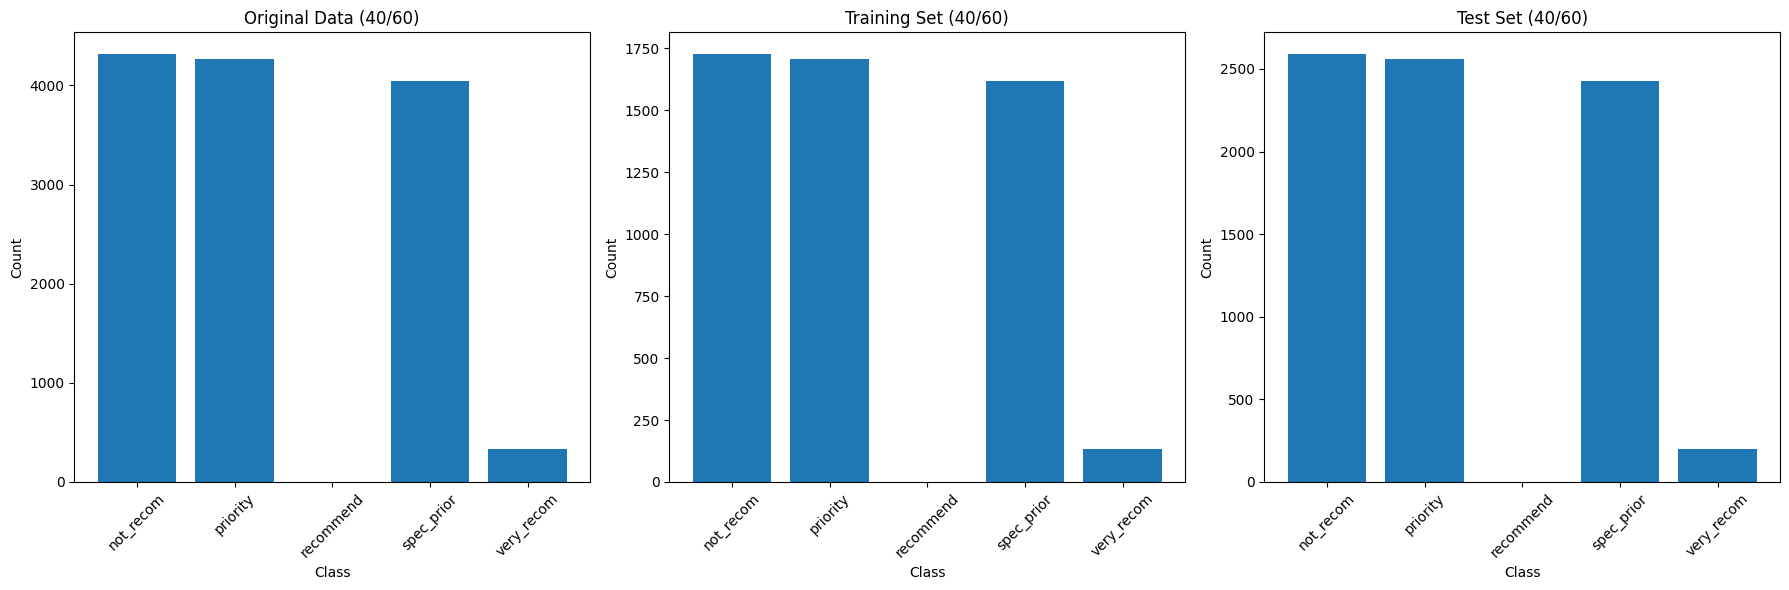

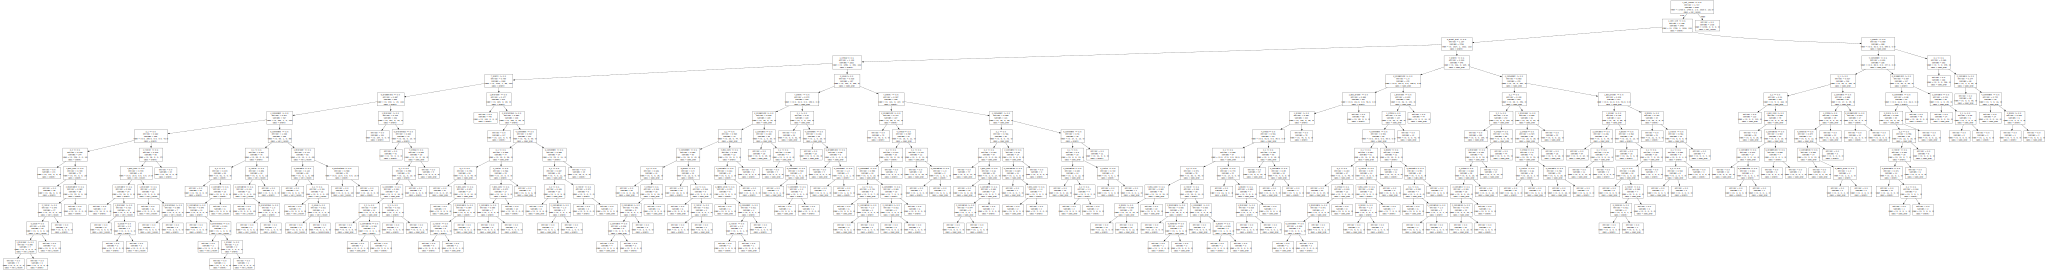

Classification report with 40/60:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      2592
    priority       0.97      0.98      0.97      2560
   recommend       0.33      1.00      0.50         1
  spec_prior       0.98      0.97      0.97      2426
  very_recom       0.97      0.96      0.96       197

    accuracy                           0.98      7776
   macro avg       0.85      0.98      0.88      7776
weighted avg       0.98      0.98      0.98      7776



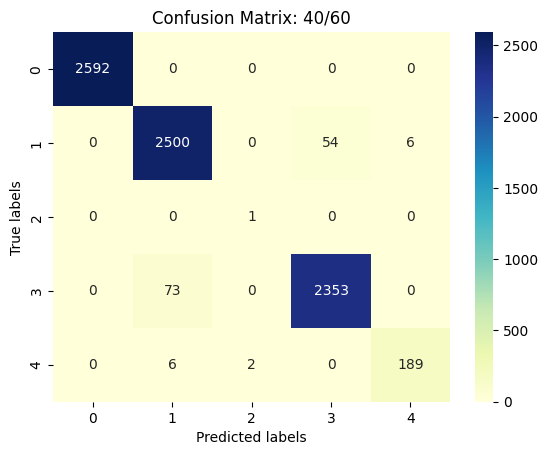

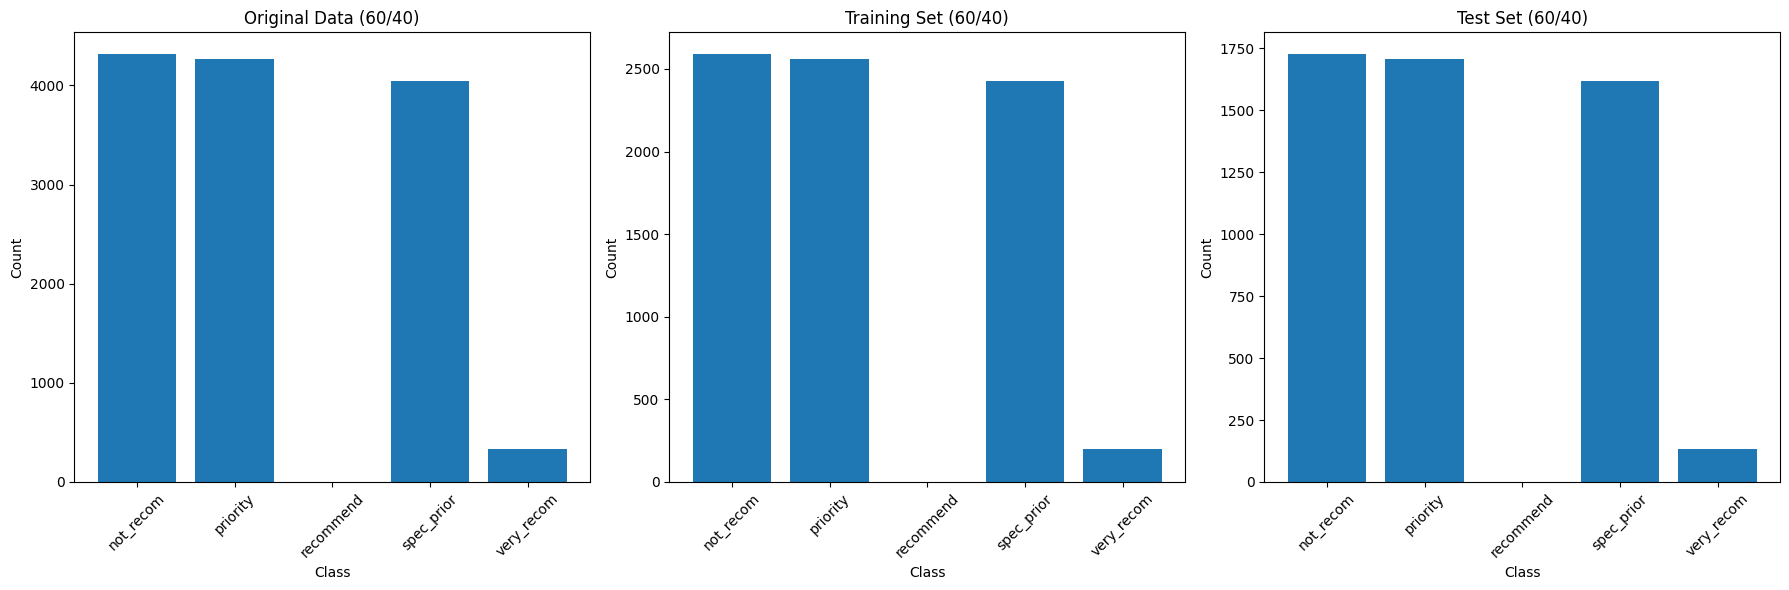

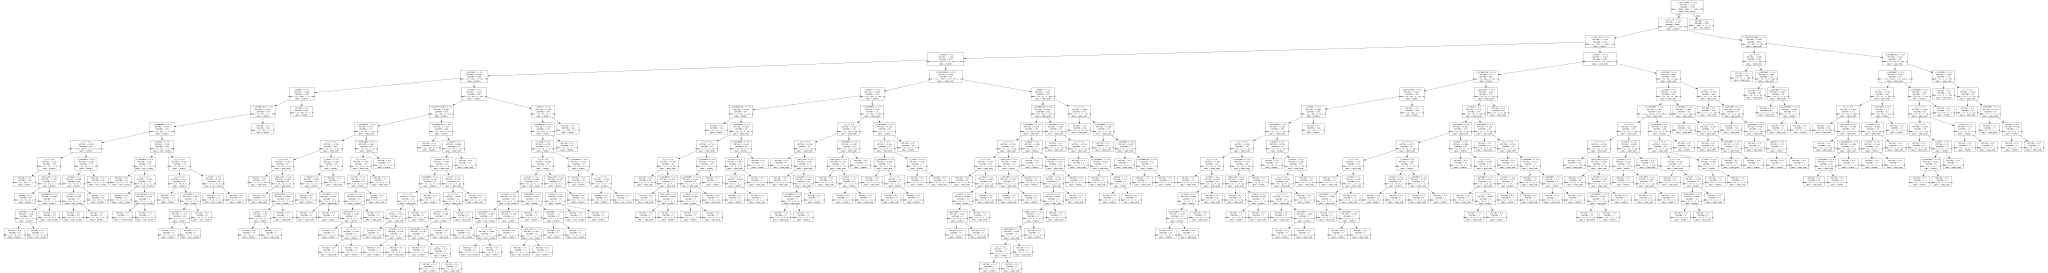

Classification report with 60/40:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00      1728
    priority       0.98      0.99      0.99      1706
   recommend       0.33      1.00      0.50         1
  spec_prior       0.99      0.99      0.99      1618
  very_recom       1.00      0.97      0.98       131

    accuracy                           0.99      5184
   macro avg       0.86      0.99      0.89      5184
weighted avg       0.99      0.99      0.99      5184



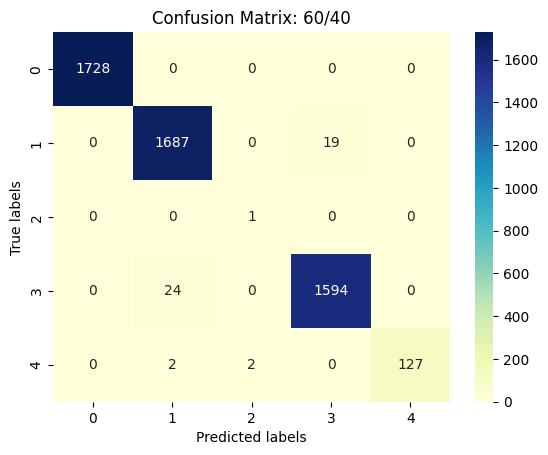

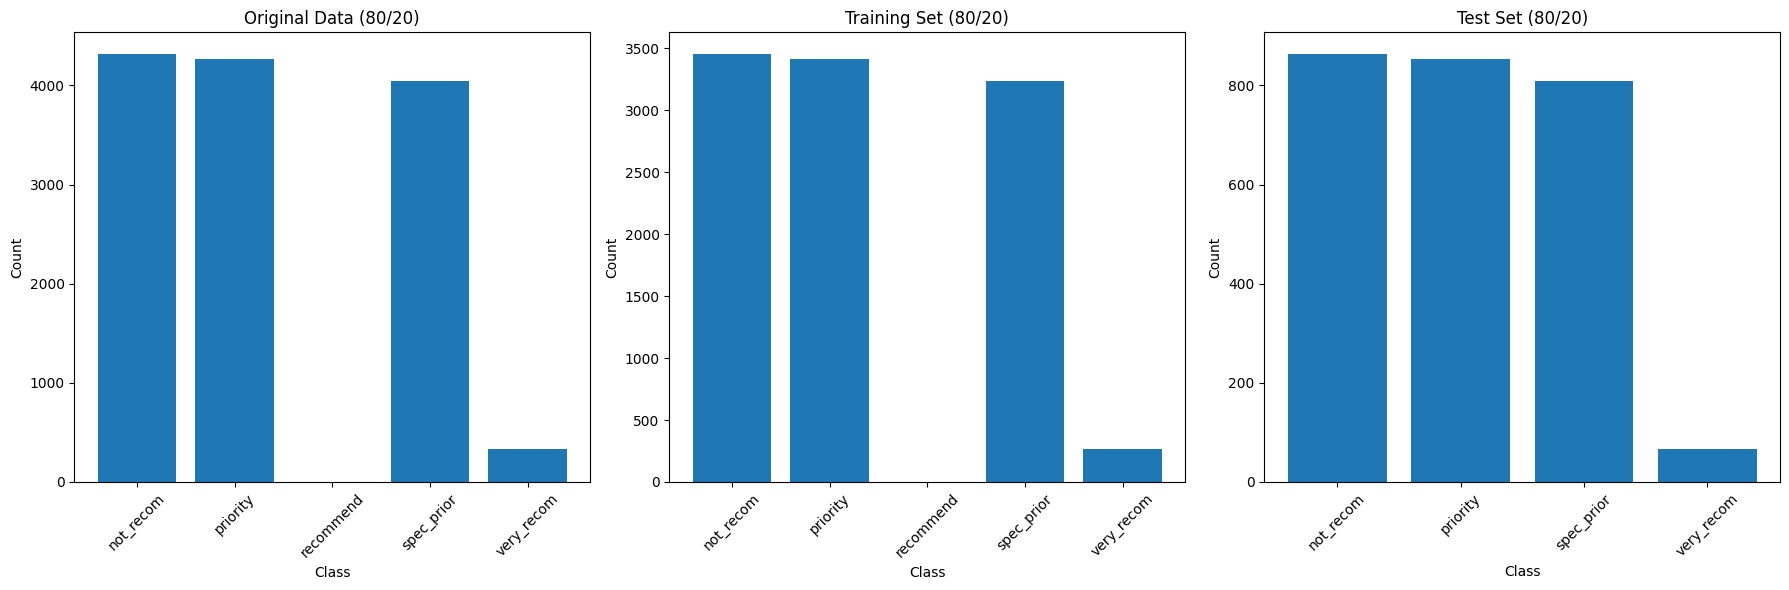

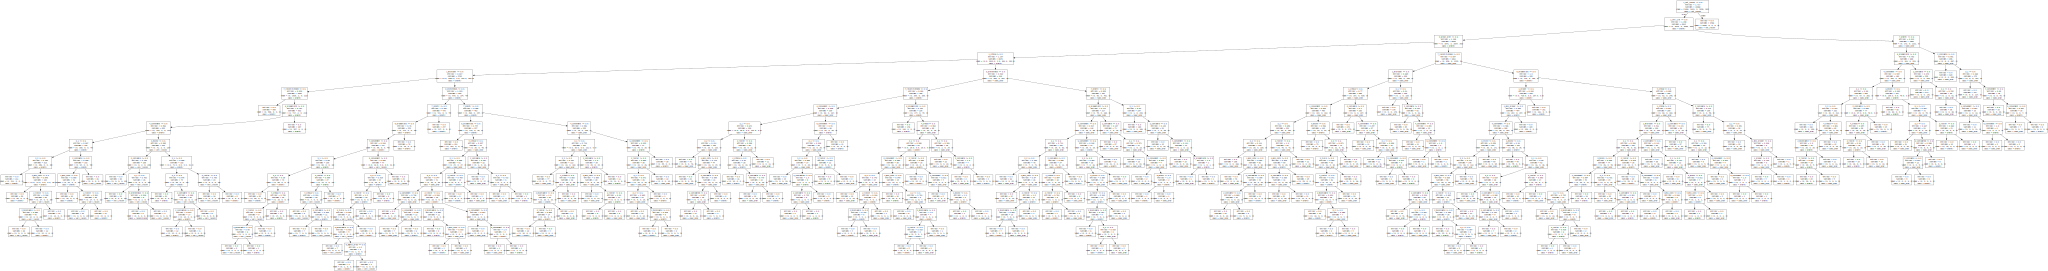

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       1.00      0.99      0.99       853
   recommend       0.00      1.00      0.00         0
  spec_prior       0.99      1.00      0.99       809
  very_recom       0.98      0.95      0.97        66

    accuracy                           0.99      2592
   macro avg       0.79      0.99      0.79      2592
weighted avg       1.00      0.99      1.00      2592



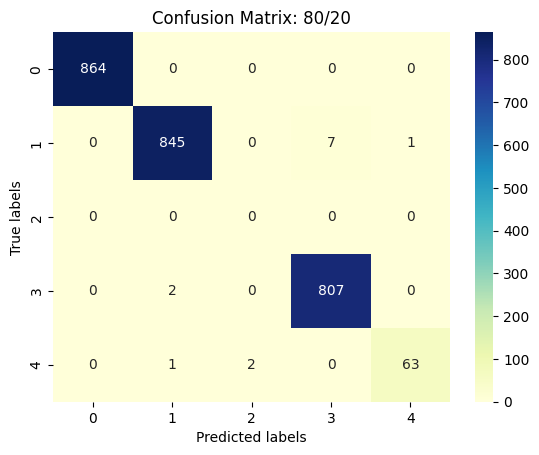

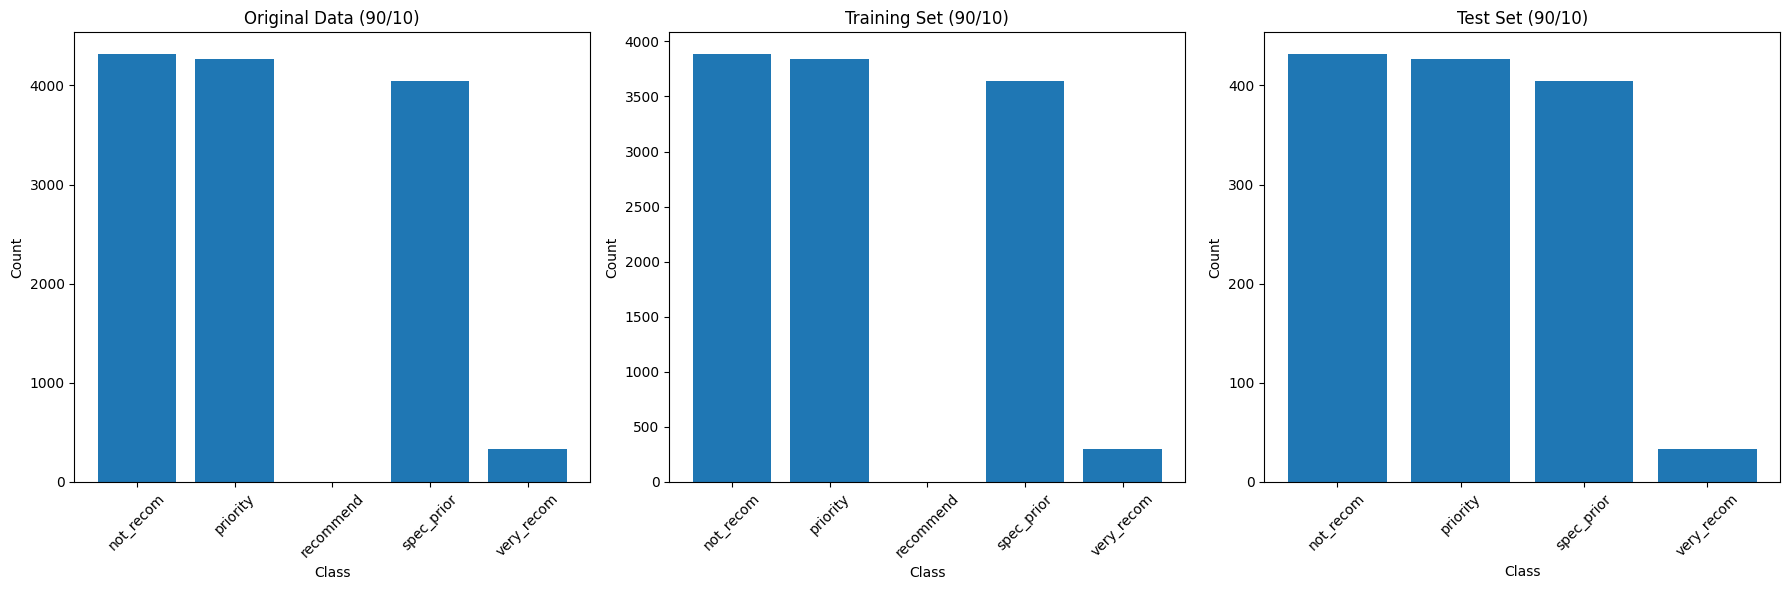

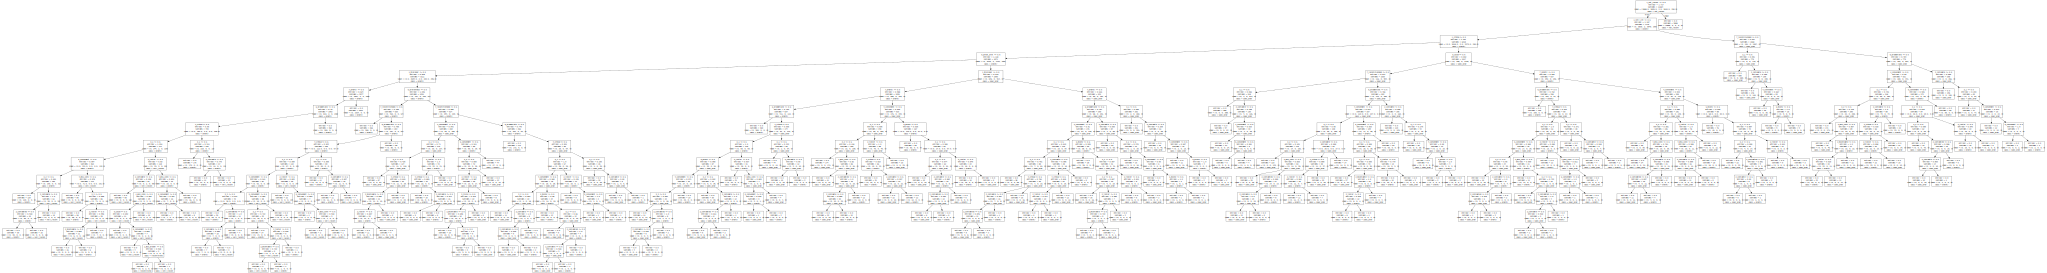

Classification report with 90/10:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       432
    priority       1.00      1.00      1.00       427
  spec_prior       1.00      1.00      1.00       404
  very_recom       1.00      1.00      1.00        33

    accuracy                           1.00      1296
   macro avg       1.00      1.00      1.00      1296
weighted avg       1.00      1.00      1.00      1296



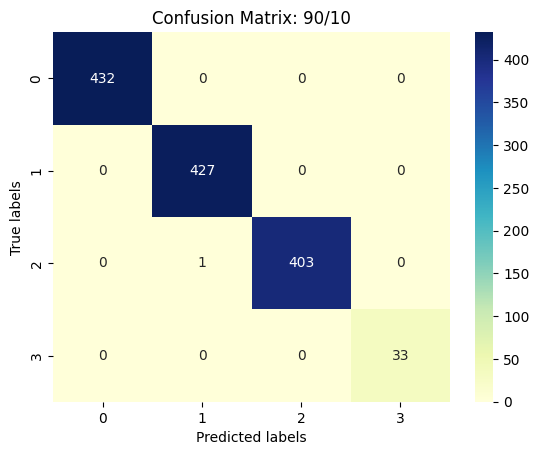

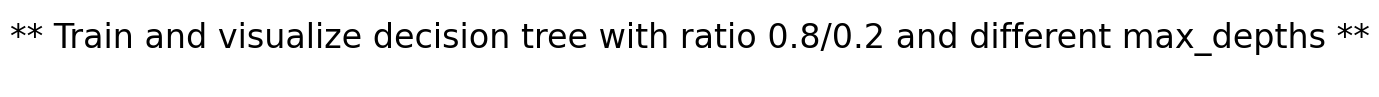

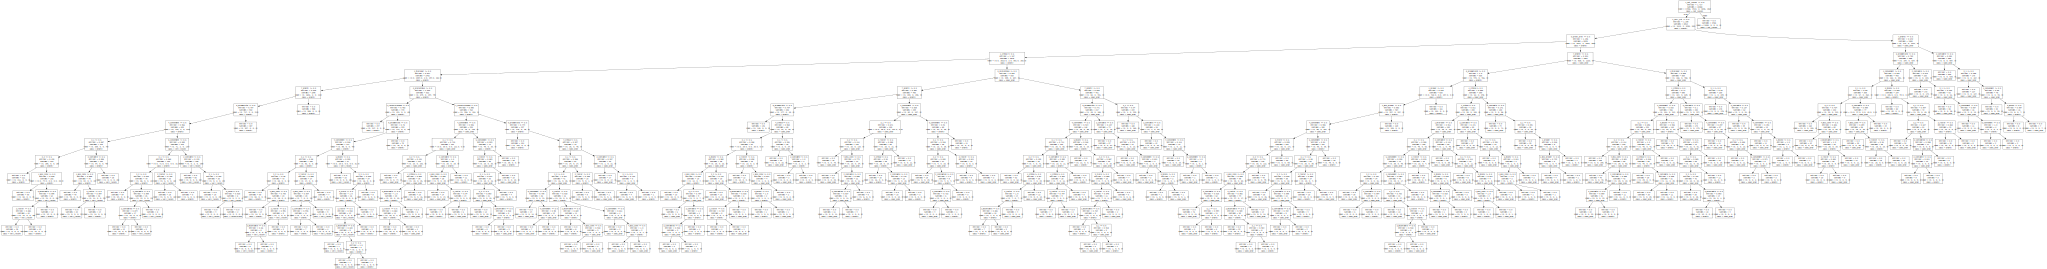

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       1.00      0.99      1.00       853
   recommend       0.00      1.00      0.00         0
  spec_prior       0.99      1.00      1.00       809
  very_recom       1.00      0.97      0.98        66

    accuracy                           1.00      2592
   macro avg       0.80      0.99      0.80      2592
weighted avg       1.00      1.00      1.00      2592



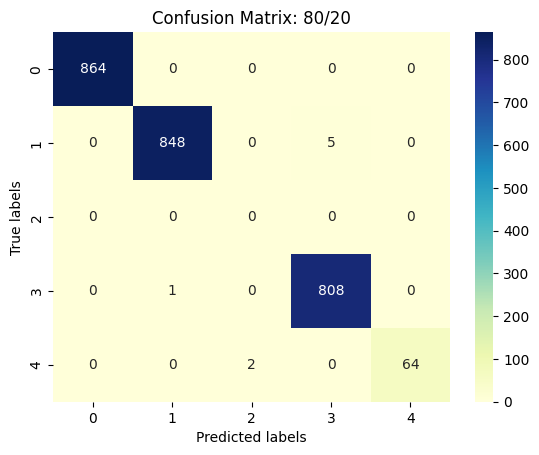

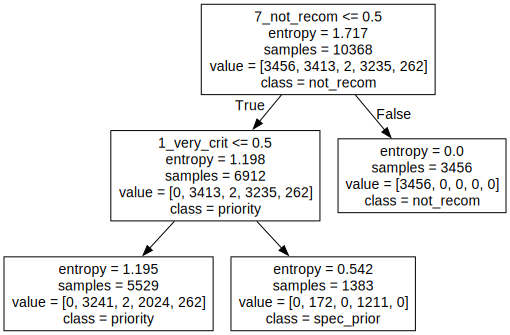

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.59      0.96      0.73       853
  spec_prior       0.89      0.38      0.53       809
  very_recom       1.00      0.00      0.00        66

    accuracy                           0.77      2592
   macro avg       0.87      0.58      0.57      2592
weighted avg       0.83      0.77      0.74      2592



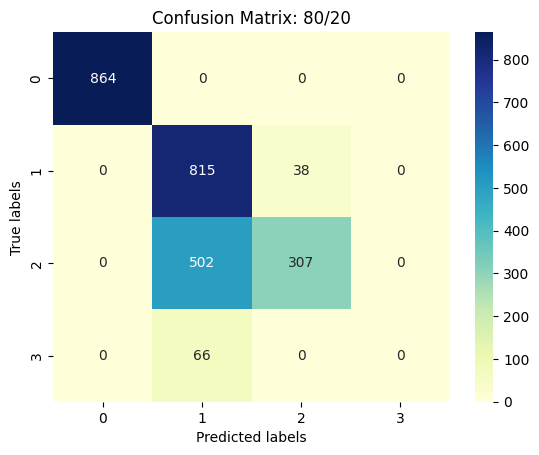

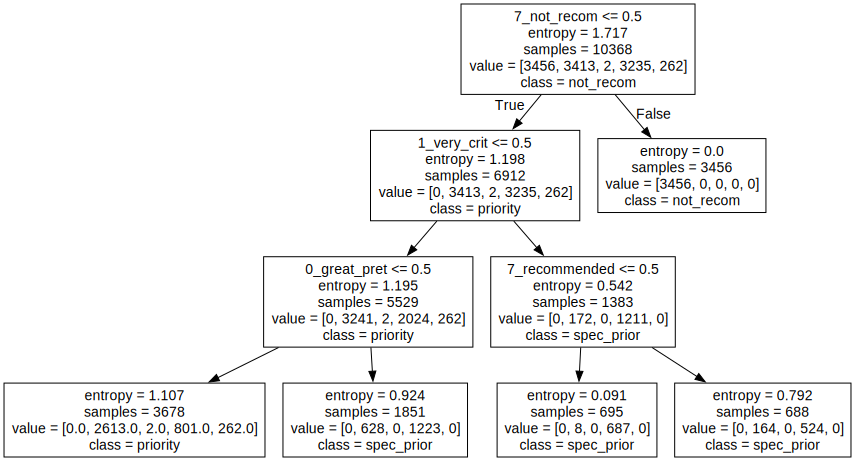

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.70      0.77      0.73       853
  spec_prior       0.75      0.74      0.75       809
  very_recom       1.00      0.00      0.00        66

    accuracy                           0.82      2592
   macro avg       0.86      0.63      0.62      2592
weighted avg       0.83      0.82      0.81      2592



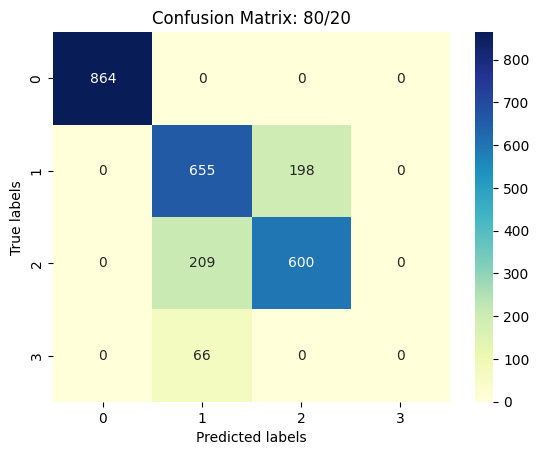

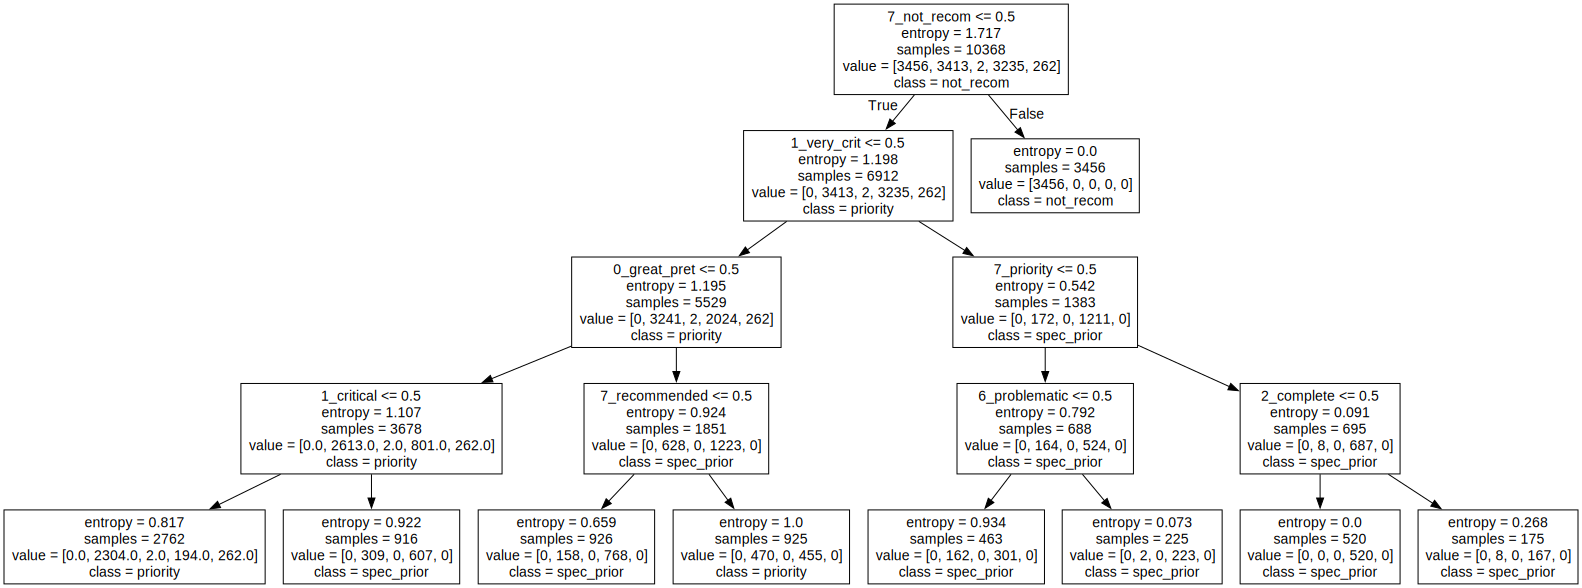

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.74      0.80      0.77       853
  spec_prior       0.79      0.79      0.79       809
  very_recom       1.00      0.00      0.00        66

    accuracy                           0.84      2592
   macro avg       0.88      0.65      0.64      2592
weighted avg       0.85      0.84      0.83      2592



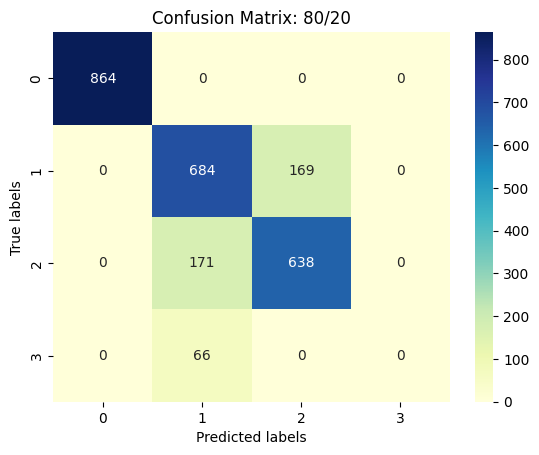

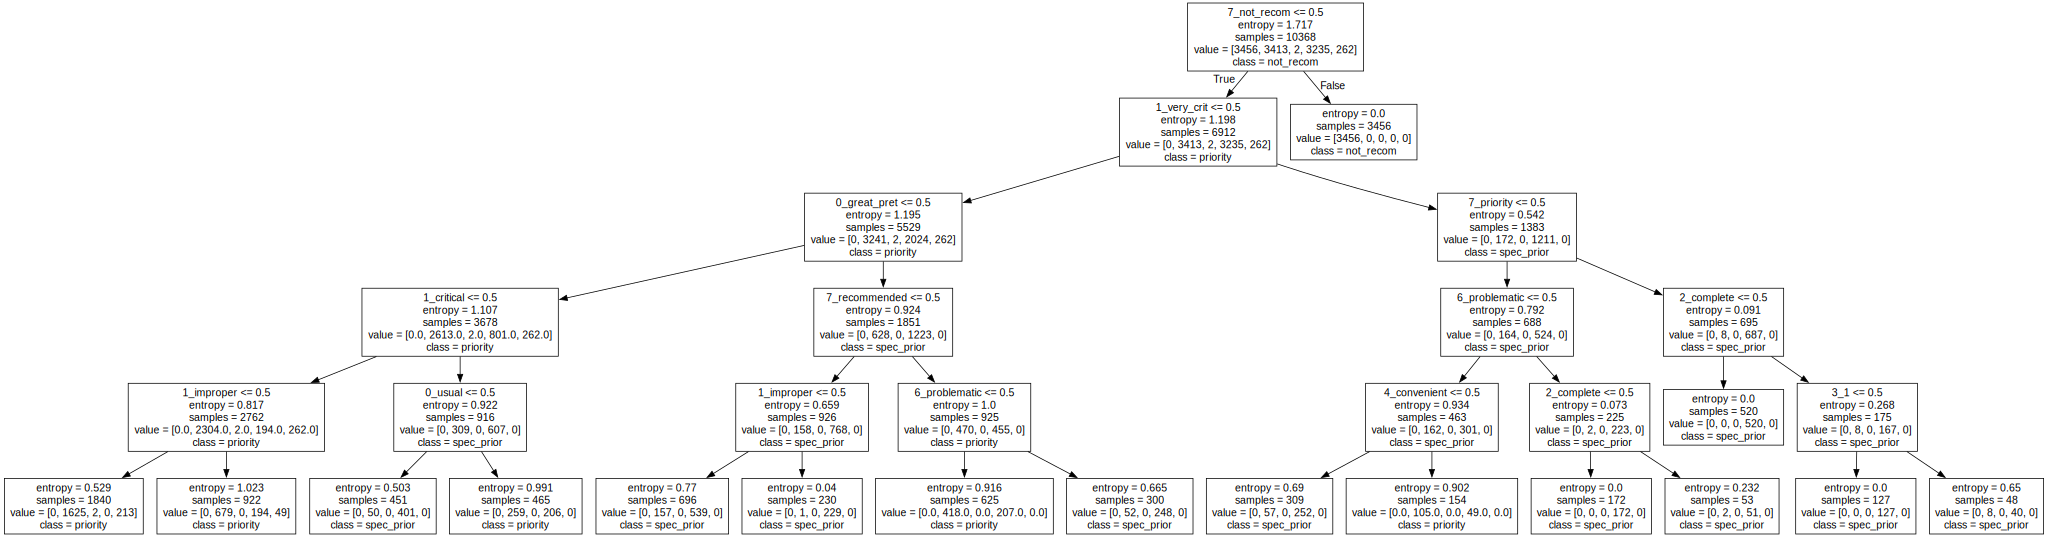

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.76      0.88      0.82       853
  spec_prior       0.87      0.79      0.83       809
  very_recom       1.00      0.00      0.00        66

    accuracy                           0.87      2592
   macro avg       0.91      0.67      0.66      2592
weighted avg       0.88      0.87      0.86      2592



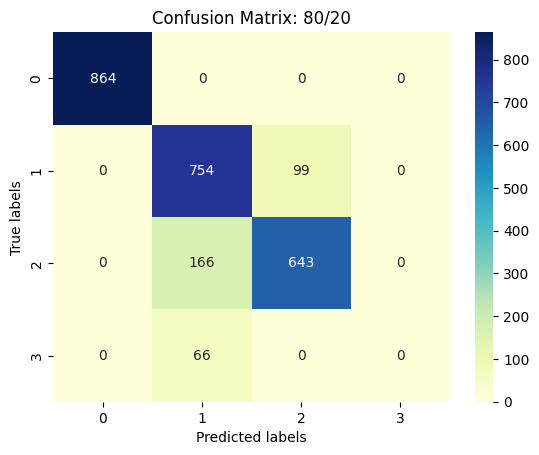

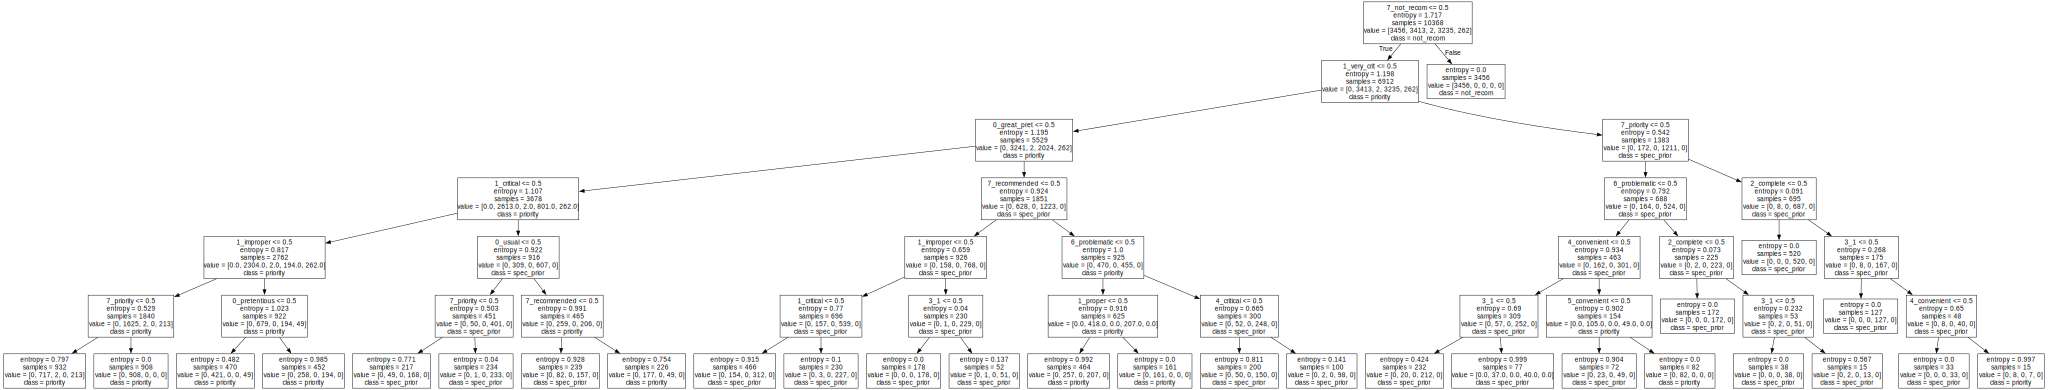

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.80      0.86      0.83       853
  spec_prior       0.85      0.85      0.85       809
  very_recom       1.00      0.00      0.00        66

    accuracy                           0.88      2592
   macro avg       0.91      0.68      0.67      2592
weighted avg       0.89      0.88      0.87      2592



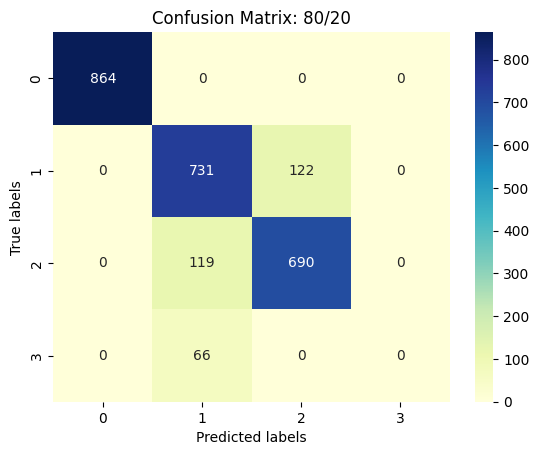

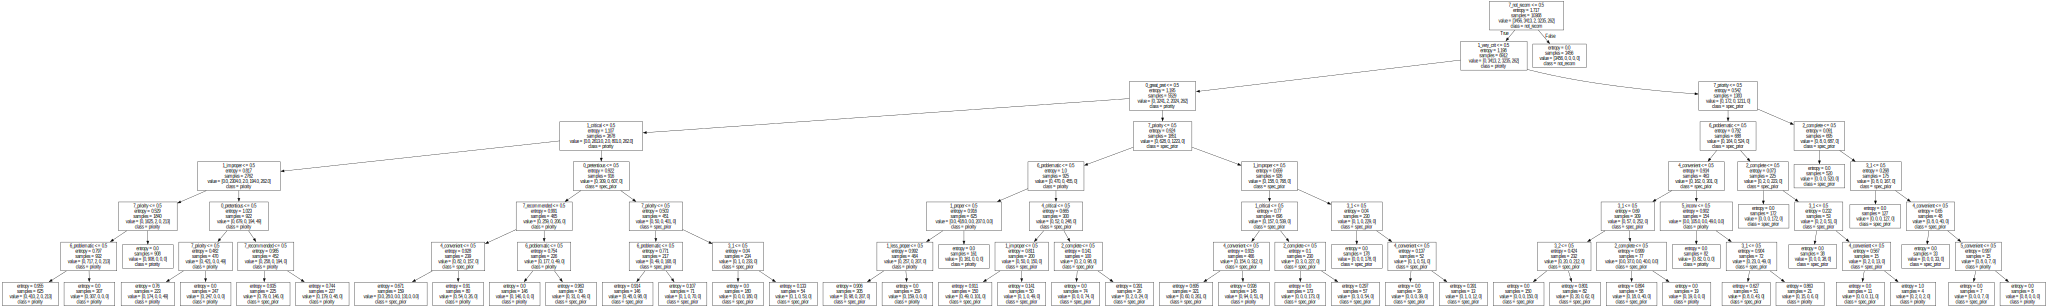

Classification report with 80/20:
              precision    recall  f1-score   support

   not_recom       1.00      1.00      1.00       864
    priority       0.87      0.85      0.86       853
  spec_prior       0.86      0.95      0.90       809
  very_recom       1.00      0.00      0.00        66

    accuracy                           0.91      2592
   macro avg       0.93      0.70      0.69      2592
weighted avg       0.91      0.91      0.90      2592



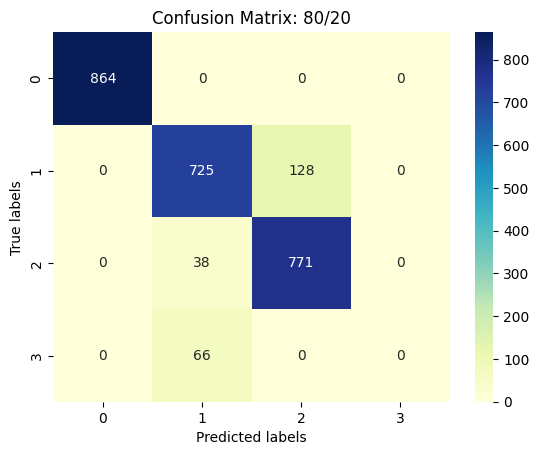

In [66]:
def main():
    # Read data from CSV file
    data = pd.read_csv('nursery.data.csv', header = None)

    # Define train/test ratios
    ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]


    # Train and visualize decision tree with different ratios and report classification results 
    plt.figure(figsize=(1,1), facecolor='none')
    plt.text(0.5, 0.5, '** Train and visualize decision tree with different ratios and report classification results **', fontsize=24, ha='center')
    plt.axis('off')
    plt.show()
    
    
    
    #print("\033[1m** Train and visualize decision tree with different ratios and report classification results **\n\033[0m")
    for train_ratio, test_ratio in ratios:
        feature_train, feature_test, label_train, label_test = shuffle_and_split_data(data, train_ratio, test_ratio)
        visualize_class_distributions(data, feature_train, feature_test, label_train, label_test, train_ratio, test_ratio)
        train_and_visualize_decision_tree(feature_train, label_train, train_ratio, test_ratio)
        predict_and_report(feature_test, label_test, train_ratio, test_ratio)
    
    # Train and visualize decision tree with ratio 0.8/0.2 and different max_depths
    plt.figure(figsize=(1,1), facecolor='none')
    plt.text(0.5, 0.5, '** Train and visualize decision tree with ratio 0.8/0.2 and different max_depths **', fontsize=24, ha='center')
    plt.axis('off')
    plt.show()
    
    #print("\033[1m\n** Train and visualize decision tree with ratio 0.8/0.2 and different max_depths **\n\033[0m")
    max_depths = [None, 2, 3, 4, 5, 6, 7]
    train_ratio, test_ratio = 0.8, 0.2
    feature_train, feature_test, label_train, label_test = shuffle_and_split_data(data, train_ratio, test_ratio)
    for max_depth in max_depths:
        train_and_visualize_decision_tree(feature_train, label_train, train_ratio, test_ratio, max_depth)
        predict_and_report(feature_test, label_test, train_ratio, test_ratio)


if __name__ == "__main__":
    main()